В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

In [1]:
import pandas as pd
import seaborn as sns
import scipy 
import matplotlib.pyplot 
%matplotlib inline

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
df = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_statistics/all_data/conversion.csv')

In [4]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [7]:
df.xyz_campaign_id.unique()           

array([ 916,  936, 1178], dtype=int64)

In [8]:
df.age.unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [9]:
# переменная age в данном случае является ранговой, так как категории можно условно сравнить

Построим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.

In [10]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


<AxesSubplot:xlabel='sum_of_impressions', ylabel='Density'>

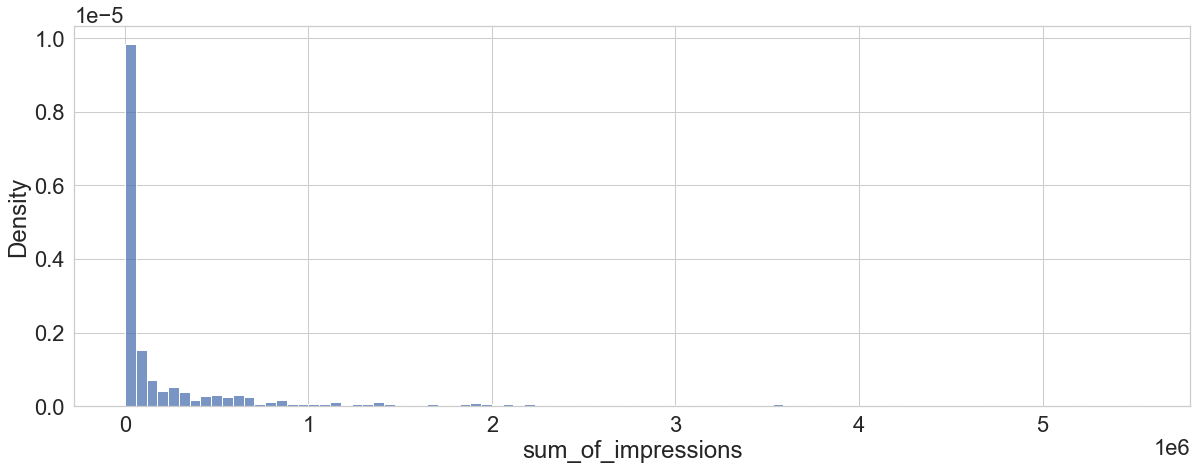

In [26]:
sns.histplot(data=df.groupby('fb_campaign_id', as_index=False) \
             .agg(sum_of_impressions=('Impressions', 'sum')), x='sum_of_impressions', stat='density')

<AxesSubplot:xlabel='sum_of_impressions', ylabel='Density'>

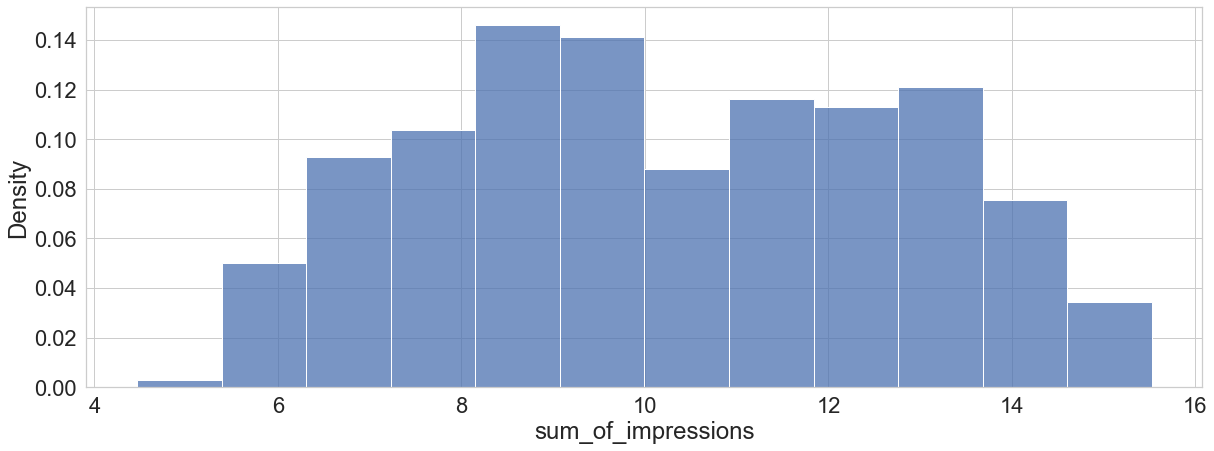

In [27]:
# log
sns.histplot(data=np.log(df.groupby('fb_campaign_id', as_index=False) \
                         .agg(sum_of_impressions=('Impressions', 'sum'))), x='sum_of_impressions', stat='density')

Попробуем понять, чем обусловлена бимодальность распределения

In [36]:
df_groped = df.groupby(['xyz_campaign_id', 'fb_campaign_id'], as_index=False) \
                                    .agg(sum_of_impressions=('Impressions', 'sum'))
df_groped['sum_of_impressions'] = np.log(df_groped['sum_of_impressions'])

<AxesSubplot:xlabel='sum_of_impressions', ylabel='Density'>

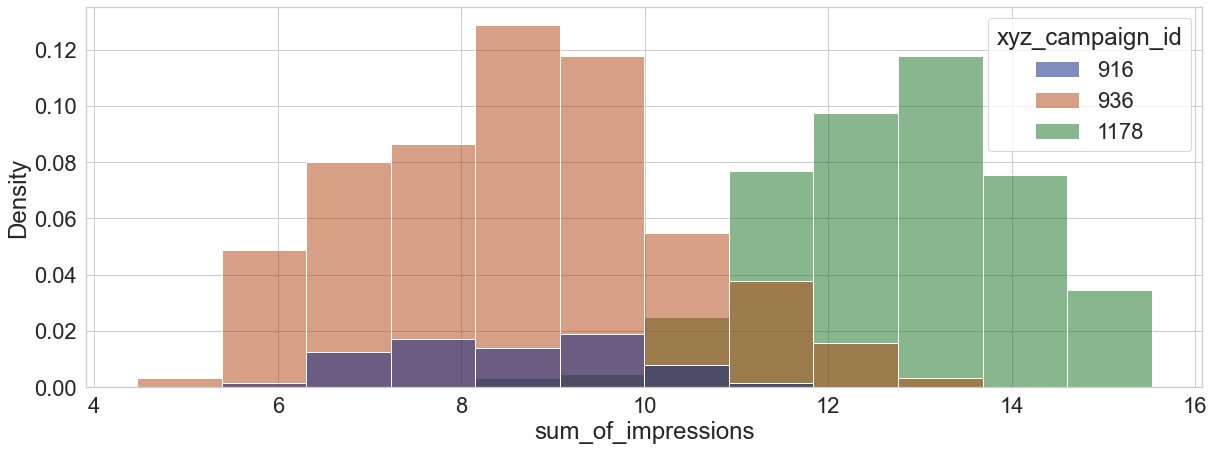

In [38]:
sns.histplot(data=df_groped, x='sum_of_impressions', stat='density', hue='xyz_campaign_id', palette='dark')

Кластеризация:

In [42]:
from sklearn.mixture import GaussianMixture

dat = np.log(df.groupby('fb_campaign_id').Impressions.sum()).values.reshape(-1, 1)

mix = GaussianMixture(n_components = 2).fit(dat)

labels = mix.predict(dat)

In [43]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [44]:
dat

array([[ 8.90245559],
       [ 9.79037484],
       [ 6.54103   ],
       [ 9.03503415],
       [ 7.5574729 ],
       [ 9.65598727],
       [ 9.30118606],
       [ 7.76429601],
       [ 9.15925758],
       [ 7.10987946],
       [ 6.5998705 ],
       [ 9.23376389],
       [ 9.5934917 ],
       [ 7.12367279],
       [ 7.74283596],
       [ 6.93147181],
       [ 8.43966399],
       [ 9.95351505],
       [ 9.05415429],
       [10.22972906],
       [ 6.32614947],
       [ 8.91462613],
       [ 9.85812401],
       [ 9.53510144],
       [ 7.24279792],
       [10.07815489],
       [10.76265752],
       [ 7.73324565],
       [ 7.68799717],
       [11.00740242],
       [ 8.03624994],
       [ 8.51998928],
       [10.56426649],
       [ 7.29505642],
       [ 7.07834158],
       [ 8.58839695],
       [10.00879307],
       [ 7.07749805],
       [ 9.47416511],
       [ 7.8272409 ],
       [ 8.67658724],
       [ 7.93128476],
       [ 8.24590926],
       [ 9.32357977],
       [ 5.6767538 ],
       [ 9

In [45]:
mix

GaussianMixture(n_components=2)

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

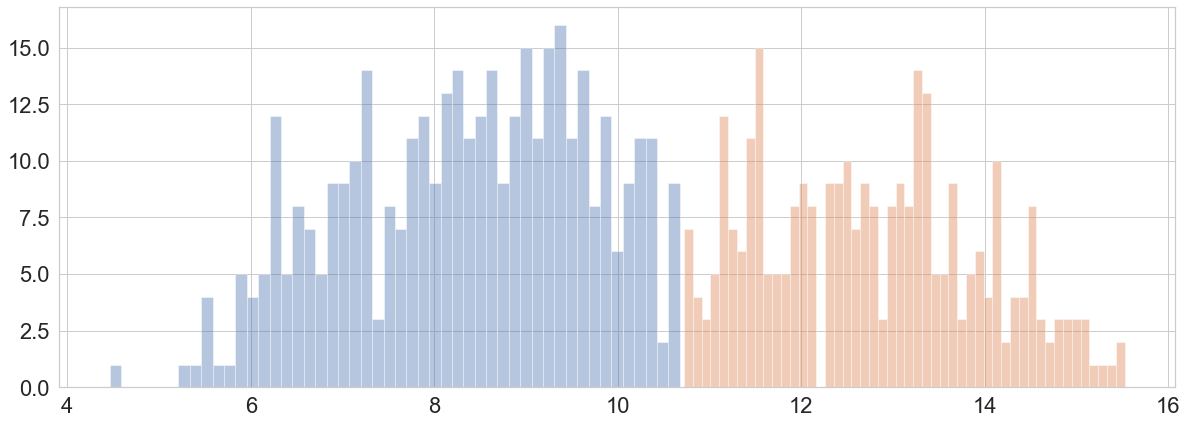

In [46]:
# визуализация
sns.distplot(dat[labels == 0], kde=False, bins=50)
sns.distplot(dat[labels == 1], kde=False, bins=50)

Создадим колонку с CTR

In [13]:
df['CTR'] = df['Clicks'] / df['Impressions']

In [14]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,0.000164
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.000115
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.000100
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,0.000160
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,0.000234
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,0.001059


In [15]:
# найдем ad_id объявления с наибольшим CTR
df.loc[df.CTR.idxmax()]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
CTR                    0.001059
Name: 150, dtype: object

<AxesSubplot:xlabel='CTR', ylabel='Count'>

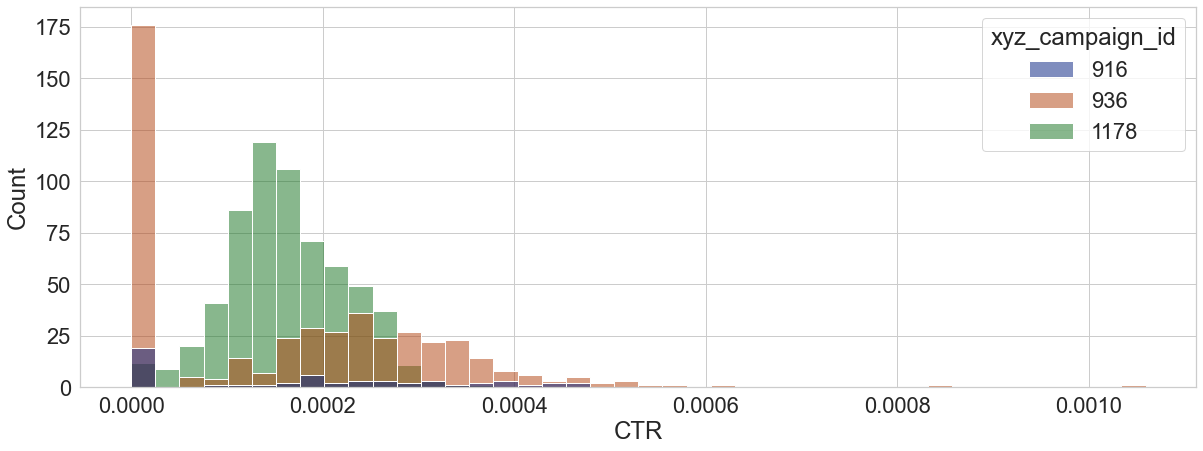

In [16]:
# посмотрим на распределение CTR по рекламным кампаниям
sns.histplot(data=df, x='CTR', hue='xyz_campaign_id', palette='dark')

Расчитаем метрику CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов

In [17]:
df['CPC'] = df['Spent'] / df['Clicks']

In [47]:
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

<AxesSubplot:xlabel='CPC', ylabel='Count'>

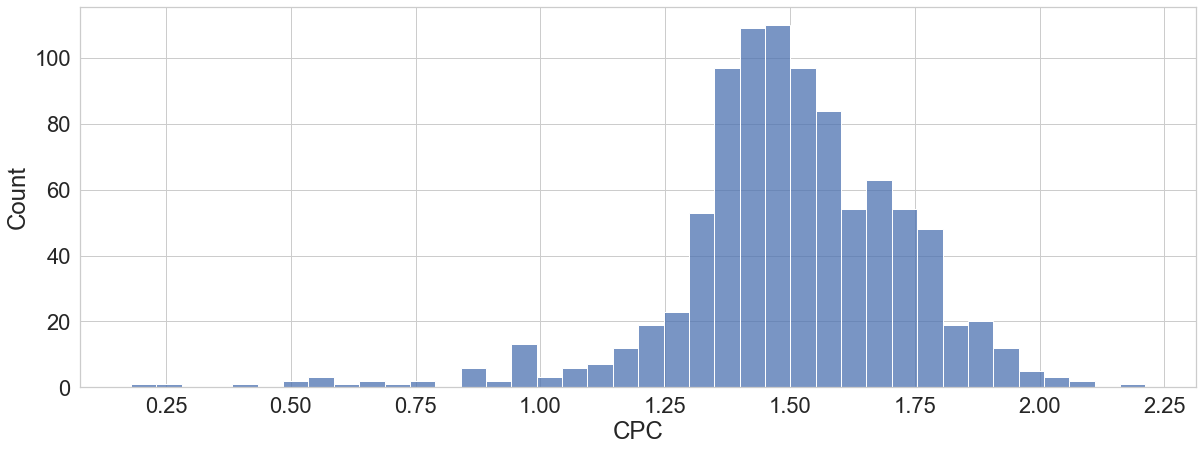

In [19]:
sns.histplot(data=df.dropna(), x='CPC')

<AxesSubplot:xlabel='CPC'>

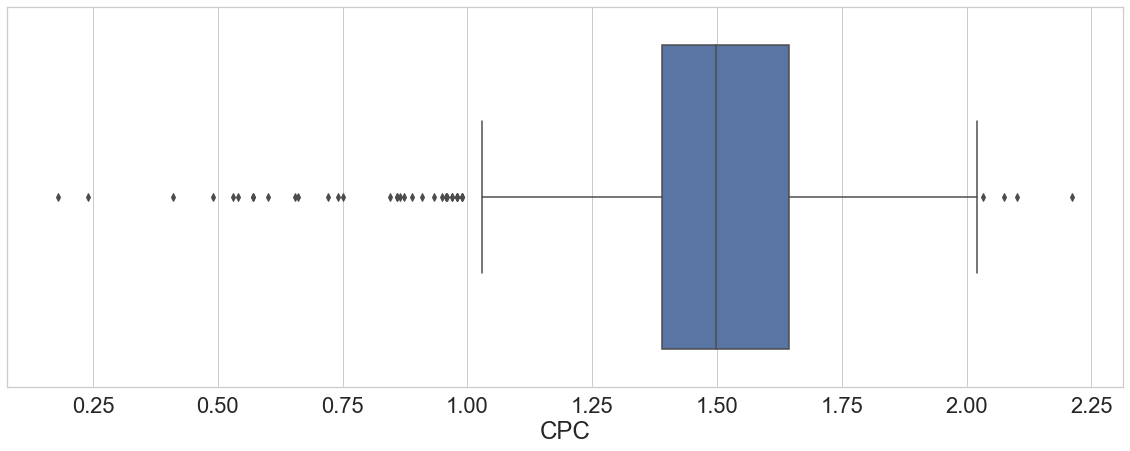

In [20]:
sns.boxplot(data=df.dropna(), x='CPC')

In [21]:
# межквартильный размах
scipy.stats.iqr(df.CPC, nan_policy='omit')

0.2543636990499998

<AxesSubplot:xlabel='CPC', ylabel='Count'>

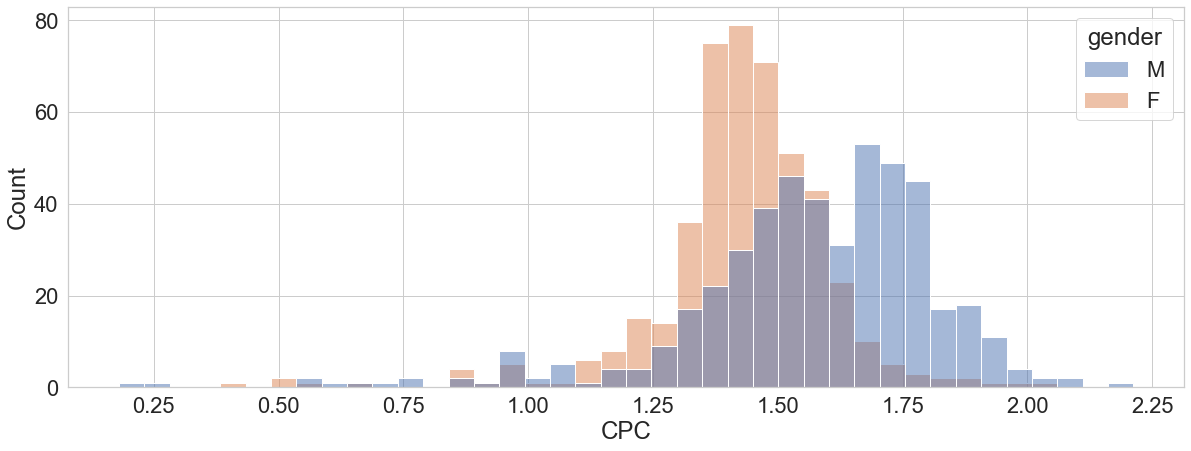

In [22]:
# разбивка по полу
sns.histplot(data=df.dropna(), x='CPC', hue='gender')

In [23]:
# конверсия из кликов в покупку
df['conversion_rate'] = df['Approved_Conversion'] * 100 / df['Clicks']

In [24]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion_rate
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,100.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.793651
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171,1.471926,1.481481


In [25]:
df.query('ad_id == 1121814')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion_rate
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,3.087886
